In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits
mnist=load_digits()
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
X, y = mnist.data, mnist.target

In [4]:
X.shape, y.shape

((1797, 64), (1797,))

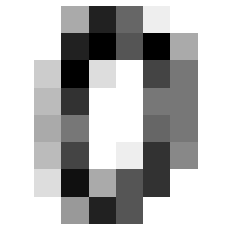

In [5]:
#Print digit
some_digit=X[0]
some_digit_image=some_digit.reshape(8,8)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [6]:
#Convert y data type to int from object
y=y.astype(np.uint8)

In [7]:
#Create Train and test data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [8]:
len(X_train), len(X_test), len(y_train), len(y_test)

(1437, 360, 1437, 360)

## Training a Binary Classifier

In [9]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

### Stochastic Gradient Descent (SGD) classifier

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [11]:
sgd_clf.predict([some_digit])

array([False])

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.97077244, 0.99582463, 0.9874739 ])

### Confusion Matrix

In [14]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[1283,   16],
       [   6,  132]], dtype=int64)

In [16]:
### Precision and recall
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8918918918918919

In [17]:
recall_score(y_train_5, y_train_pred)

0.9565217391304348

In [18]:
# F1 Score
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.9230769230769231

In [19]:
# Precision and re call trade off
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-1334.69366352])

In [20]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [21]:
y_some_digit_pred

array([False])

In [22]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [23]:
y_scores

array([ 4247.75510312,  -964.10698097, -4236.59505859, ...,
       -3681.04290828, -1033.81035903, -3251.24547247])

In [24]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

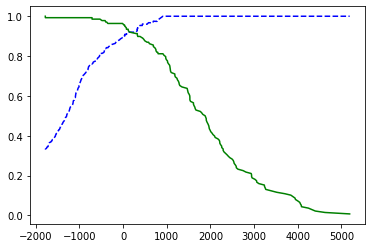

In [25]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    [...] # highlight the threshold and add the legend, axis label, and grid

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [26]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] # ~7816

In [27]:
y_train_pred_90 = (y_scores >= threshold_90_precision)


In [28]:
precision_score(y_train_5, y_train_pred_90)

0.9041095890410958

In [29]:
 recall_score(y_train_5, y_train_pred_90)

0.9565217391304348

### ROC Curve

In [30]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

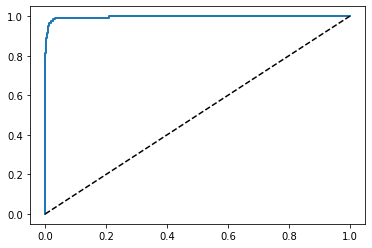

In [31]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    [...] # Add axis labels and grid

plot_roc_curve(fpr, tpr)
plt.show()

In [32]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9969262866642121

## Multiclass Classification

In [36]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train) # y_train, not y_train_5
svm_clf.predict([some_digit])

array([0], dtype=uint8)

In [37]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 9.30933359, -0.29561013,  1.7608331 ,  4.7943974 ,  1.75523924,
         7.22342554,  2.7837787 ,  2.77390523,  6.12493722,  8.25363398]])

In [38]:
np.argmax(some_digit_scores)

0

In [40]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.94989562, 0.95824635, 0.95407098])

In [44]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[131,   0,   0,   0,   0,   0,   1,   0,   1,   0],
       [  0, 132,   0,   0,   0,   0,   1,   0,   6,   2],
       [  0,   1, 140,   1,   0,   0,   0,   0,   3,   0],
       [  0,   0,   1, 137,   0,   0,   0,   2,   4,   1],
       [  0,   1,   0,   0, 140,   0,   2,   2,   0,   2],
       [  0,   1,   0,   0,   0, 130,   0,   0,   2,   5],
       [  0,   1,   0,   0,   0,   1, 141,   0,   1,   0],
       [  0,   0,   0,   0,   3,   0,   0, 148,   0,   1],
       [  0,   7,   1,   0,   0,   0,   0,   0, 143,   0],
       [  0,   1,   0,   5,   0,   2,   0,   0,   4, 129]], dtype=int64)

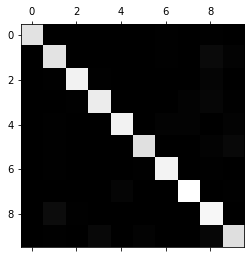

In [46]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [47]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

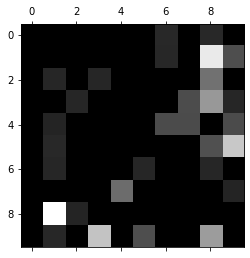

In [48]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

### Multilabel Classification

In [51]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [52]:
knn_clf.predict([some_digit])

array([[False, False]])

In [53]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9822166824455154

### Multioutput Classification

In [55]:
noise = np.random.randint(0, 100, (len(X_train), 64))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 64))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [58]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[1]])
clean_digit

array([[ 0.,  0.,  0., 12., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  8.,  4.,
        13.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  9.,  2.,  0.,  0.,  0.,
         0.,  0.,  0., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  8.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  2.,
         7.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  7.,  0.,  0.]])